In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

import pandas as pd
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set('notebook')

import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
ikea=pd.read_csv('IKEA_SA_Furniture_Web_Scrapings_sss.csv')

# STEP 1
Step 1: EDA - shape, head, tail, sample, info

In [4]:
ikea.shape # checking the shape

(3694, 14)

In [5]:
ikea.info() # checking the datatypes
ikea.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [6]:
# checking the values of 'other_colors" column
ikea['other_colors'].unique()
ikea['other_colors'].value_counts()

other_colors
No     2182
Yes    1512
Name: count, dtype: int64

In [7]:
ikea.isna().sum() # Nulls check
#ikea.notna().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [8]:
ikea.columns # all columns check

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [9]:
ikea.describe() # basic stat

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [10]:
ikea.head(20) # sample, tail

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


In [11]:
ikea.duplicated().sum() # check for duplicates, overall

0

In [12]:
ikea['item_id'].duplicated().sum() # dups check on certain column

732

In [13]:
ikea[ikea['item_id']==79241940] # retrieving certain item_ids to check where the information from other columns differs
ikea[ikea['item_id']==30247378]
ikea[ikea['item_id']==30373164]

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
654,654,30373164,KLACKBERG,Bookcases & shelving units,35.0,No old price,True,https://www.ikea.com/sa/en/p/klackberg-knob-si...,No,"Knob, 35 mm",Charlie Styrbjörn,30.0,NaN,NaN
984,984,30373164,KLACKBERG,Cabinets & cupboards,35.0,No old price,True,https://www.ikea.com/sa/en/p/klackberg-knob-si...,No,"Knob, 35 mm",Charlie Styrbjörn,30.0,NaN,NaN
3431,3431,30373164,KLACKBERG,TV & media furniture,35.0,No old price,True,https://www.ikea.com/sa/en/p/klackberg-knob-si...,No,"Knob, 35 mm",Charlie Styrbjörn,30.0,NaN,NaN


In [14]:
# check the designer column
ikea['designer'].unique()
ikea['designer'].sample(30)

18                        John/Jonas/Petrus/Paul/Caroline
1792                                        Carl Öjerstam
868                                          Carina Bengs
634                                        IKEA of Sweden
2394                                         Ola Wihlborg
2582                         IKEA of Sweden/Henrik Preutz
3550                       IKEA of Sweden/Ehlén Johansson
1352         Jon Karlsson/John/Jonas/Petrus/Paul/Caroline
2486                                        Henrik Preutz
997                                          Jon Karlsson
3585                                      Ehlén Johansson
3558                                       IKEA of Sweden
2501    502.555.36 Easy to fold up and easy to move.Fi...
2998                        K Malmvall/E Lilja Löwenhielm
281                                        IKEA of Sweden
1909                                    Studio Copenhagen
2801                                       IKEA of Sweden
2516    IKEA o

# Conclusions on STEP 1.
Dataset Ikea contains 3694 rows and 14 columns with following datatypes: bool(1), float64(4), int64(2), object(7). The column'other_colors' is presented as an object, but in my opinion it should be transformed to the boolean datatype as it won't change the essence of its values, but will simplify further operations with it.
The majority of columns have no null values, except the last three ones: depth (1463 Null values), height (988), width (589). 

The 'designer' column has values more likely to be the description of the product rather then the name of the designer. If we are leaving the column as it is, it will affect our further calculations. 
Dropping the column may be the solution if we don't need to use it for further analysis. 

No duplicated values were found in the dataset while performing this check on the overall initial dataset.
But the revision for duplicates by columns resulted in founding duplicates in a column, which is supposed to be unique: item_id (732 duplicates respectfully). 
Review of those duplicated values has drew me to the conclusion that the only reason those item ids are duplicated is that they are present in several different categories.
Thus the solution lies in creation of the subset of data, where we can drop the duplicates without affecting the 'category' column and use it for the further analysis which doesn't require the presence of the 'category' column. And if we'll need to perform some actions using this column we may refer to the initial dataset.

Due to this primar research it is obvious that the main problems are the presence of duplicates in item_id column (already explained above) and the presence of null values in the three columns which define the product dimensions - depth, height and width. The number of null values are far less then 50%, so in this case I wouldn't suggest dropping this columns. As an alternative, we can fill the data with mean or mode values. Also we can use the K-Nearest Neighbour method to predict the missing numbers in regard to the closest ones.

 # STEP 2 

 basic visualization and analysis


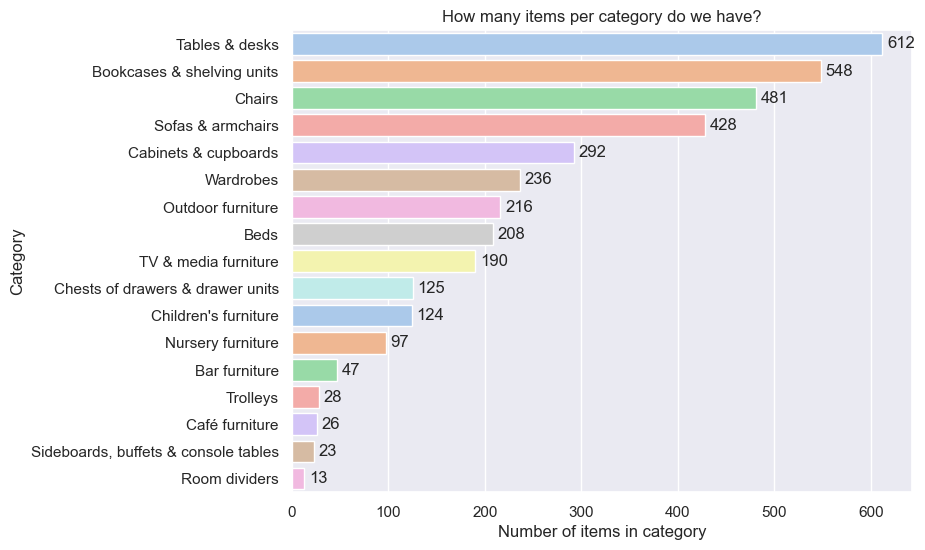

In [15]:
# 1. Which category has the highest amount of items?
category_counts = ikea['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

category_counts = category_counts.sort_values('count', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=category_counts, y='category', x='count', ci=None, palette='pastel')
for i, count in enumerate(category_counts['count']):
    plt.text(count + 5, i, f'{count}', va='center')

plt.xlabel('Number of items in category')
plt.ylabel('Category')
plt.title('How many items per category do we have?')
plt.show()


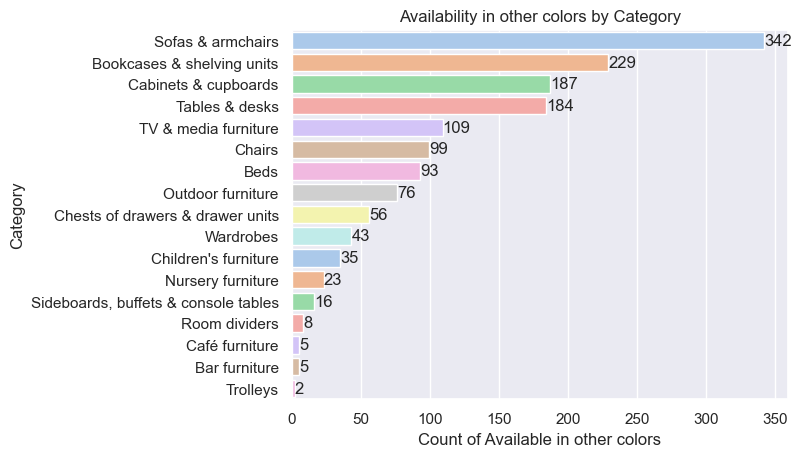

In [16]:
# 2. transforming the 'other_colors' column to boolean for further operations. 
ikea['other_colors_bool'] = ikea['other_colors'].map({'Yes': True, 'No': False}) 

group=ikea.groupby('category')['other_colors_bool'].sum().sort_values(ascending=False)
sns.barplot(x=group.values, y=group.index, palette='pastel')
for i, count in enumerate(group.values):
    plt.text(count + 0.1, i, f'{count}', va='center')
plt.xlabel('Count of Available in other colors')
plt.ylabel('Category')
plt.title('Availability in other colors by Category')
plt.show()

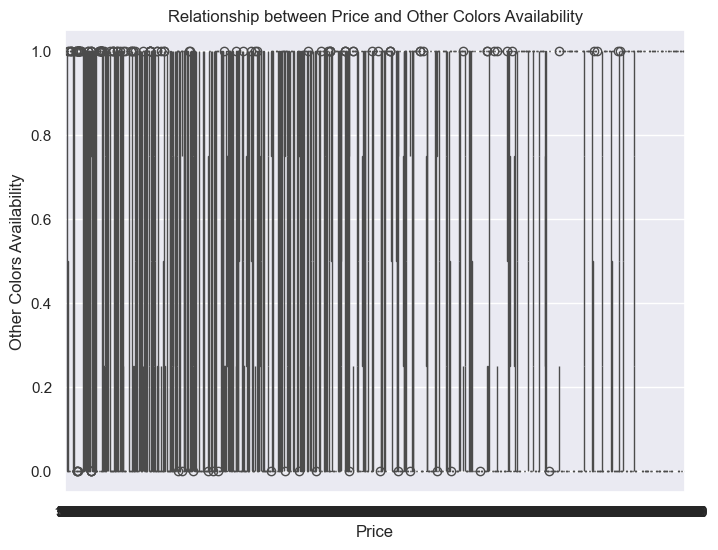

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', y='other_colors_bool', data=ikea)
plt.title('Relationship between Price and Other Colors Availability')
plt.xlabel('Price')
plt.ylabel('Other Colors Availability')
plt.show()

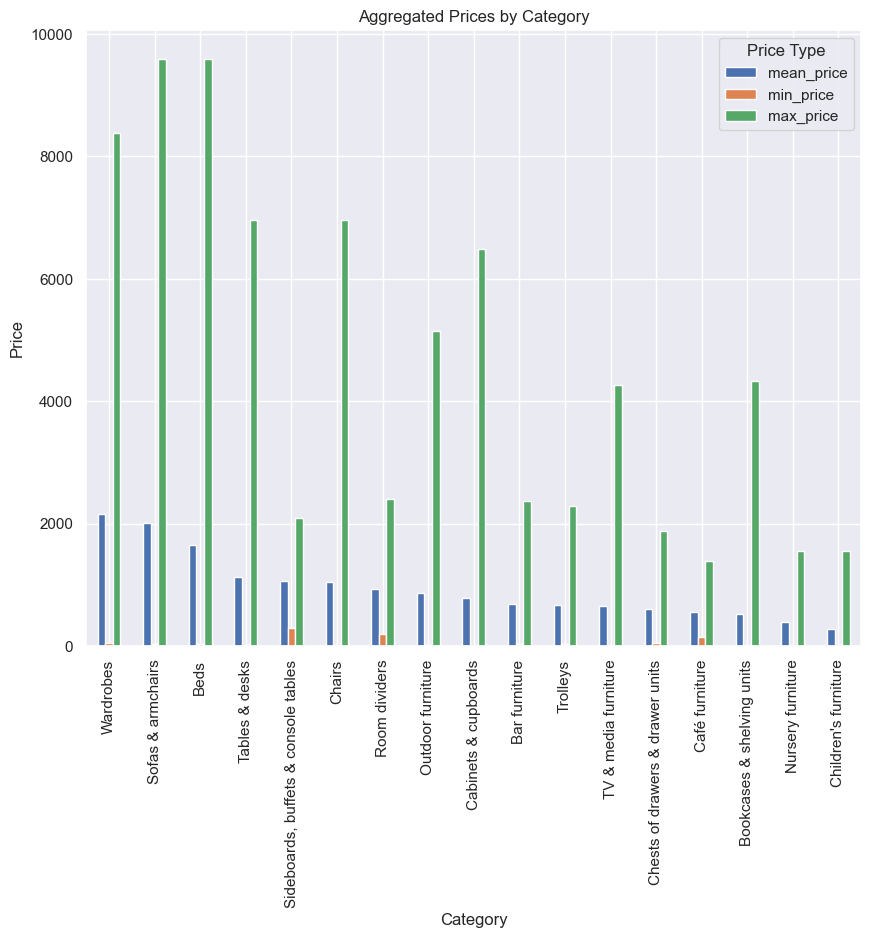

In [ ]:
# Find min, max and average price values per category
agg_stat=ikea.groupby('category').agg(
    mean_price=('price', lambda x: round(x.mean(), 2)),
    min_price=('price', 'min'),
    max_price=('price', 'max')
).sort_values(['mean_price'], ascending=[False])

agg_stat.plot(kind='bar', figsize=(10, 8))
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Aggregated Prices by Category')
plt.legend(title='Price Type')
plt.show()



In [ ]:
ikea.groupby('category')['price'].nlargest(3)

category                                  
Bar furniture                         38      2375.0
                                      9       2176.0
                                      39      2176.0
Beds                                  190     9585.0
                                      118     8551.0
                                      205     8356.0
Bookcases & shelving units            359     4335.0
                                      548     4260.0
                                      398     3986.0
Cabinets & cupboards                  893     6480.0
                                      871     5290.0
                                      1026    4770.0
Café furniture                        1100    1385.0
                                      1113    1385.0
                                      1115    1340.0
Chairs                                1426    6965.0
                                      1490    6965.0
                                      1326    6065.0
Che

<Axes: xlabel='price', ylabel='Density'>

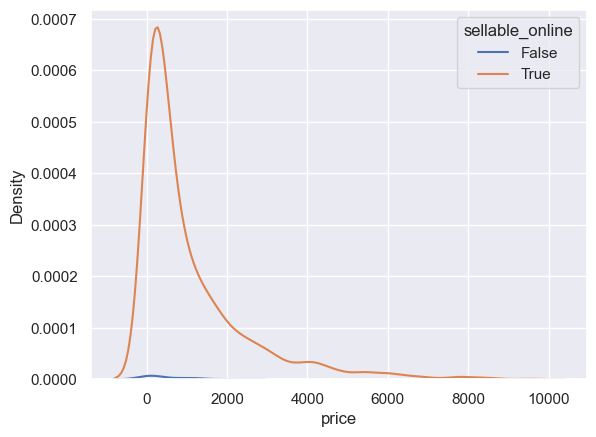

In [ ]:
sns.kdeplot(data=ikea, x="price", hue="sellable_online")

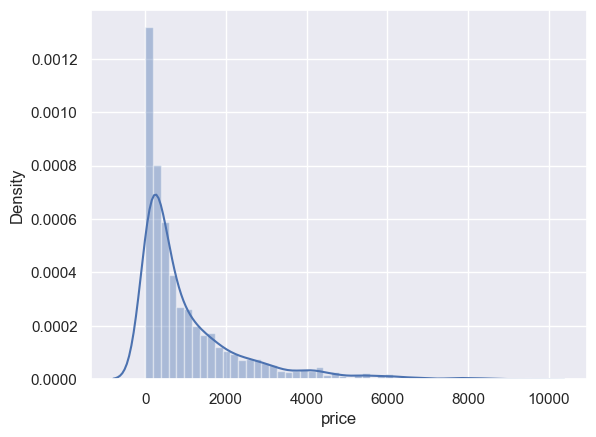

In [ ]:
sns.distplot(ikea['price']);

In [ ]:
# Creation of a new dataset excluding 'category' column. 
subset_no1=ikea.copy().drop(columns=['category', 'other_colors', 'Unnamed: 0'])
subset_no1.sample(5)


,item_id,name,price,old_price,sellable_online,link,short_description,designer,depth,height,width,other_colors_bool
2675,60466500,LJUV,245.0,No old price,True,https://www.ikea.com/sa/en/p/ljuv-tray-table-g...,"Tray table, 65x32 cm",Nada Debs,NaN,32.0,NaN,False
2540,59255706,GRÖNLID,3760.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-corner-s...,"Corner sofa, 3-seat",Francis Cayouette/Ehlén Johansson,98.0,104.0,235.0,True
3523,39248590,PLATSA,1560.0,"SR 1,950",True,https://www.ikea.com/sa/en/p/platsa-wardrobe-w...,"Wardrobe, 175-200x57x251 cm",IKEA of Sweden/Ola Wihlborg,57.0,251.0,140.0,False
515,20365188,GALANT,575.0,No old price,True,https://www.ikea.com/sa/en/p/galant-shelf-unit...,"Shelf unit, 80x120 cm",K Malmvall/E Lilja Löwenhielm,45.0,120.0,80.0,True
2563,9293107,LIDHULT,4841.0,"SR 5,640",True,https://www.ikea.com/sa/en/p/lidhult-2-seat-so...,2-seat sofa-bed section,Henrik Preutz/IKEA of Sweden,97.0,95.0,160.0,False


In [ ]:
ikea[[  'item_id', 'name', 'price', 'old_price', 'sellable_online', 'link', 'other_colors', 'short_description', 'designer', 'depth', 'height', 'width', 'other_colors_bool']].duplicated().sum()

732

In [ ]:
subset_no1[[ 'item_id',	'name',	'price', 'old_price', 'sellable_online', 'link', 'short_description', 'designer', 'depth', 'height', 'width', 'other_colors_bool']].duplicated().sum()


732

In [ ]:
# dropping the duplicates
subset_no1.drop_duplicates(inplace=True)

In [ ]:
# duplicate check - there are 0 duplicates now and subset is ready for the further analysis.
subset_no1.duplicated().sum() # 0 
subset_no1.sample(5)

,item_id,name,price,old_price,sellable_online,link,short_description,designer,depth,height,width,other_colors_bool
2150,79291360,FRÖSÖN/DUVHOLMEN,70.0,No old price,True,https://www.ikea.com/sa/en/p/froesoen-duvholme...,"Chair cushion, outdoor, 50x50 cm",Eva Lilja Löwenhielm/IKEA of Sweden,50.0,NaN,50.0,True
72,99157983,NESTTUN,595.0,No old price,True,https://www.ikea.com/sa/en/p/nesttun-bed-frame...,"Bed frame, 140x200 cm",IKEA of Sweden/David Wahl,NaN,95.0,146.0,True
782,29248538,IVAR,1013.0,No old price,True,https://www.ikea.com/sa/en/p/ivar-3-sections-s...,"3 sections/shelves, 139x50x12...",IKEA of Sweden,50.0,NaN,139.0,False
1074,50294793,HANVIKEN,100.0,No old price,True,https://www.ikea.com/sa/en/p/hanviken-door-bla...,"Door, 60x64 cm",Marcus Arvonen,NaN,64.0,60.0,True
547,89020472,BILLY,915.0,No old price,True,https://www.ikea.com/sa/en/p/billy-bookcase-bl...,"Bookcase, 120x28x237 cm",Gillis Lundgren/IKEA of Sweden,28.0,237.0,120.0,True
